# 関東学生マーケティング大会

In [83]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 20.04 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] GPArotation_2014.11-1 psych_2.0.9           forcats_0.5.0        
 [4] stringr_1.4.0         dplyr_1.0.0           purrr_0.3.4          
 [7] readr_1.3.1           tidyr_1.1.0           tibble_3.0.3         
[10] ggplot2_3.3.2         tidyverse_1.3.0       repr_1.1.0           

loaded via a namespace (and not attached):

# import library

In [1]:
library(tidyverse)
install.packages("psych")
install.packages("GPArotation")
library(psych)
library(GPArotation)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# 分散分析

## データ対応表

In [2]:
read.csv("input/426200000002_Layout.txt", sep="\t", fileEncoding="cp932", skip=1)

質問番号,質問タイプ,アイテム名,ラベル,回答タイプ,カテゴリ数,カラム,選択肢番号,質問文.選択肢
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
,,MID,MID,MID,NA,1,NA,回答者ID
,,DAY,DAY,D,NA,2,NA,回答日時
SEX,S,SEX,SEX,SA,2,3,NA,性別
,,,,,NA,NA,1,男性
,,,,,NA,NA,2,女性
AGE,NUM,AGE,AGE,NUM,NA,4,NA,年齢(歳)
GEN,S,GEN,GEN,SA,7,5,NA,年齢
,,,,,NA,NA,1,15歳未満
,,,,,NA,NA,2,15歳〜19歳


 ## データの読み込み

In [3]:
df <- read.csv("input/426200000002_Rawdata.txt", sep="\t")
df

MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,⋯,q3s1,q3s2,q3s3,q3s4,q3s5,q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000003719,2020/10/09 20:58,2,46,5,13,3,7,1,2,⋯,6,6,3,3,5,2,2,2,2,2
1000020349,2020/10/10 08:20,2,47,5,14,3,8,2,1,⋯,3,6,6,6,2,1,2,3,3,3
1000031002,2020/10/09 18:16,1,47,5,14,3,4,1,2,⋯,1,1,6,2,6,2,2,1,2,2
1000036392,2020/10/09 19:59,1,45,5,13,3,4,2,1,⋯,4,6,1,4,6,1,2,2,2,2
1000040558,2020/10/09 17:59,2,38,4,29,5,8,2,1,⋯,1,6,1,5,5,3,3,3,3,3
1000049046,2020/10/09 18:43,1,49,5,28,5,4,2,1,⋯,1,6,6,6,6,1,3,2,3,1
1000052816,2020/10/10 08:37,2,45,5,11,3,9,2,1,⋯,1,6,4,5,5,4,4,3,3,3
1000052818,2020/10/09 18:21,1,42,5,14,3,3,2,2,⋯,2,1,1,5,5,1,2,2,1,1
1000103312,2020/10/09 18:25,1,40,5,13,3,3,1,2,⋯,1,1,1,1,1,3,3,1,1,2


In [4]:
colnames(df)

[1] "MID"  "DAY"  "SEX"  "AGE"  "GEN"  "PRE"  "ARE"  "JOB"  "MAR"  "CHI" 
[11] "q1"   "q2"   "q3s1" "q3s2" "q3s3" "q3s4" "q3s5" "q4s1" "q4s2" "q4s3"
[21] "q4s4" "q4s5"

In [5]:
usedf <- df %>%
    select(-c(DAY, GEN, PRE, ARE, JOB, MAR, CHI, q1, q2))
usedf

MID,SEX,AGE,q3s1,q3s2,q3s3,q3s4,q3s5,q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000003719,2,46,6,6,3,3,5,2,2,2,2,2
1000020349,2,47,3,6,6,6,2,1,2,3,3,3
1000031002,1,47,1,1,6,2,6,2,2,1,2,2
1000036392,1,45,4,6,1,4,6,1,2,2,2,2
1000040558,2,38,1,6,1,5,5,3,3,3,3,3
1000049046,1,49,1,6,6,6,6,1,3,2,3,1
1000052816,2,45,1,6,4,5,5,4,4,3,3,3
1000052818,1,42,2,1,1,5,5,1,2,2,1,1
1000103312,1,40,1,1,1,1,1,3,3,1,1,2


In [6]:
d.q <- df %>%
    select(starts_with("q")) %>%
    select(-c(q1, q2))
d.q

q3s1,q3s2,q3s3,q3s4,q3s5,q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6,6,3,3,5,2,2,2,2,2
3,6,6,6,2,1,2,3,3,3
1,1,6,2,6,2,2,1,2,2
4,6,1,4,6,1,2,2,2,2
1,6,1,5,5,3,3,3,3,3
1,6,6,6,6,1,3,2,3,1
1,6,4,5,5,4,4,3,3,3
2,1,1,5,5,1,2,2,1,1
1,1,1,1,1,3,3,1,1,2


In [7]:
tapply(ana.data$q4, ana.data$media, sd) 

ERROR: Error in tapply(ana.data$q4, ana.data$media, sd): object 'ana.data' not found


In [8]:
summary(d.q)

      q3s1            q3s2            q3s3            q3s4           q3s5      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.00   1st Qu.:4.000  
 Median :1.000   Median :6.000   Median :1.000   Median :2.00   Median :5.000  
 Mean   :1.923   Mean   :4.487   Mean   :2.643   Mean   :2.69   Mean   :4.673  
 3rd Qu.:2.000   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:4.00   3rd Qu.:6.000  
 Max.   :6.000   Max.   :6.000   Max.   :6.000   Max.   :6.00   Max.   :6.000  
      q4s1           q4s2           q4s3           q4s4            q4s5      
 Min.   :1.00   Min.   :1.00   Min.   :1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.00   1st Qu.:2.00   1st Qu.:2.00   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.00   Median :3.00   Median :2.00   Median :2.000   Median :2.000  
 Mean   :2.51   Mean   :2.67   Mean   :2.32   Mean   :2.343   Mean   :2.317  
 3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:3.00   3rd 

## メディアデータのみ抽出

In [9]:
# TV
d.tv <- usedf %>%
    select(q3s1, q4s1)
# 新聞
d.np <- usedf %>%
    select(q3s2, q4s2)
# SNS
d.sns <- usedf %>%
    select(q3s3, q4s3)
# 動画共有サイト
d.ms <- usedf %>%
    select(q3s4, q4s4)
# 情報共有サイト
d.is <- usedf %>%
    select(q3s5, q4s5)

 ## 信頼度

In [10]:
q4 <- usedf %>%
    select(starts_with("q4"))

In [ ]:
q4

In [11]:
# メディアグループの作成
fac.name <- data.frame(name = c("TV", "NP", "SNS", "MS", "IS"))
levels <- as.vector(fac.name[,1])
ana.data$order <- factor(ana.data$group, levels=levels, labels=letters[1:ncol(q4)])

ERROR: Error in factor(ana.data$group, levels = levels, labels = letters[1:ncol(q4)]): object 'ana.data' not found


In [12]:
# 
df.ana <- q4[,1:3]
df.ana$trust <- q4$q4s1[1:ncol(q4)]

### 分散分析用データの読み込み

In [71]:
ana.data <- read.csv("input/426200000002_Rawdata_ana.txt", sep="\t")
ana.data.fix <- read.csv("input/426200000002_Rawdata_ana_fix.txt", sep="\t")

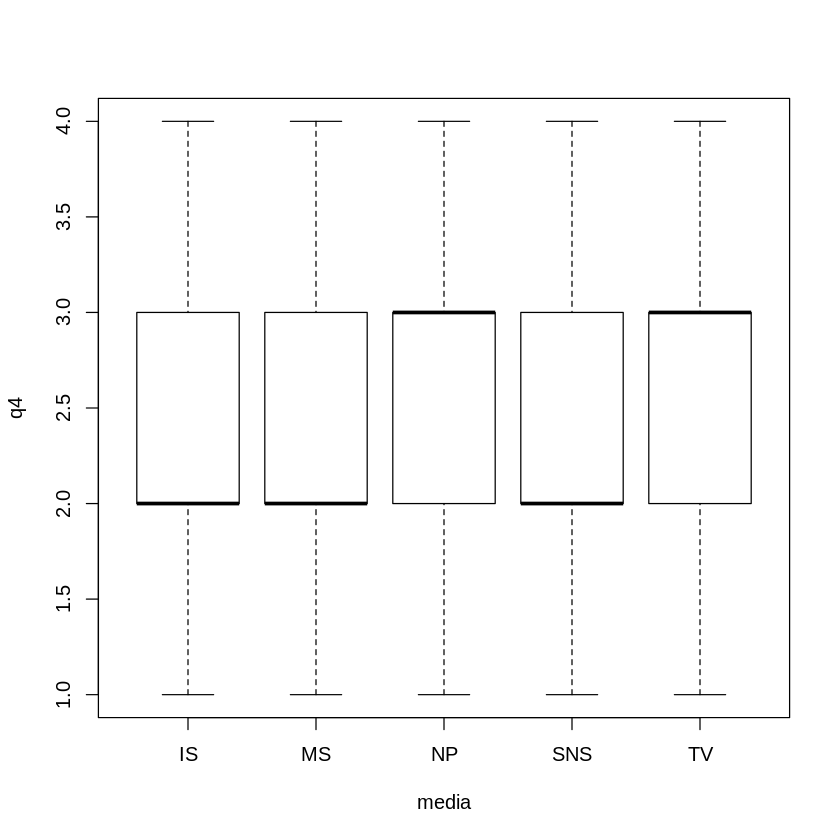

In [72]:
plot(q4 ~ media, data = ana.data)

In [73]:
ana.data$media <- factor(ana.data$media, levels=c("TV", "NP", "SNS", "MS", "IS"))
ana.data.fix$media <- factor(ana.data.fix$media, levels=c("TV", "NP", "SNS", "MS", "IS"))

In [74]:
ana.des <- ana.data %>% 
    group_by(media) %>%
    summarize(mean = mean(q4), sd = sd(q4), se = sd(q4)/sqrt(length(q4)))
ana.des <- data.frame(ana.des)

`summarise()` ungrouping output (override with `.groups` argument)



In [75]:
ana.des

media,mean,sd,se
<fct>,<dbl>,<dbl>,<dbl>
TV,2.510000,0.9932380,0.05734462
NP,2.670000,0.9473250,0.05469384
SNS,2.320000,0.8524605,0.04921683
MS,2.343333,0.8212004,0.04741203
IS,2.316667,0.8238028,0.04756228


In [76]:
ana.fix.des <- ana.data.fix %>% 
    group_by(media) %>%
    summarize(mean = mean(q4), sd = sd(q4), se = sd(q4)/sqrt(length(q4)))
ana.fix.des <- data.frame(ana.fix.des)

`summarise()` ungrouping output (override with `.groups` argument)



In [77]:
ana.fix.des

media,mean,sd,se
<fct>,<dbl>,<dbl>,<dbl>
TV,2.539792,0.9714544,0.05714437
NP,2.705882,0.9166667,0.05392157
SNS,2.342561,0.8272413,0.04866125
MS,2.366782,0.7930276,0.04664868
IS,2.339100,0.7966252,0.04686031


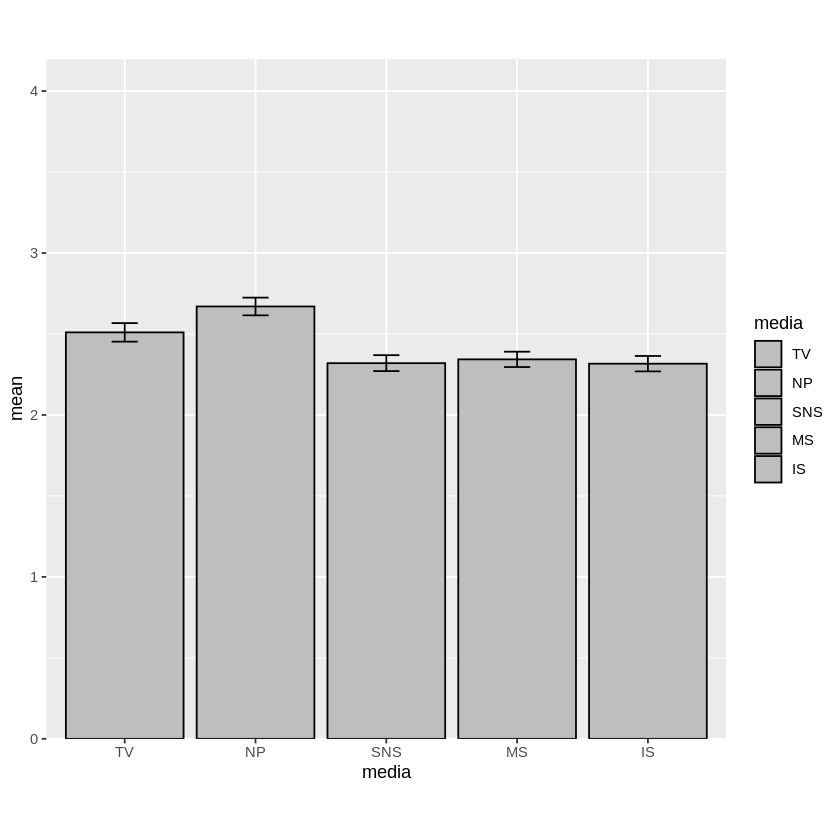

In [78]:
bp <- ggplot(ana.des,
           aes(x = media,
               y = mean,
               fill = media
               )
           )

bp <- bp + geom_bar(stat="identity", colour="black", position=position_dodge())
bp <- bp + scale_fill_manual(values=c("gray","gray","gray","gray","gray"))
bp <- bp + geom_errorbar(aes(ymin=mean-se,ymax=mean+se), width=.2)
bp <- bp + scale_y_continuous(expand=c(0,0), limits=c(0, 4.2))
bp <- bp + theme(aspect.ratio=1)
bp

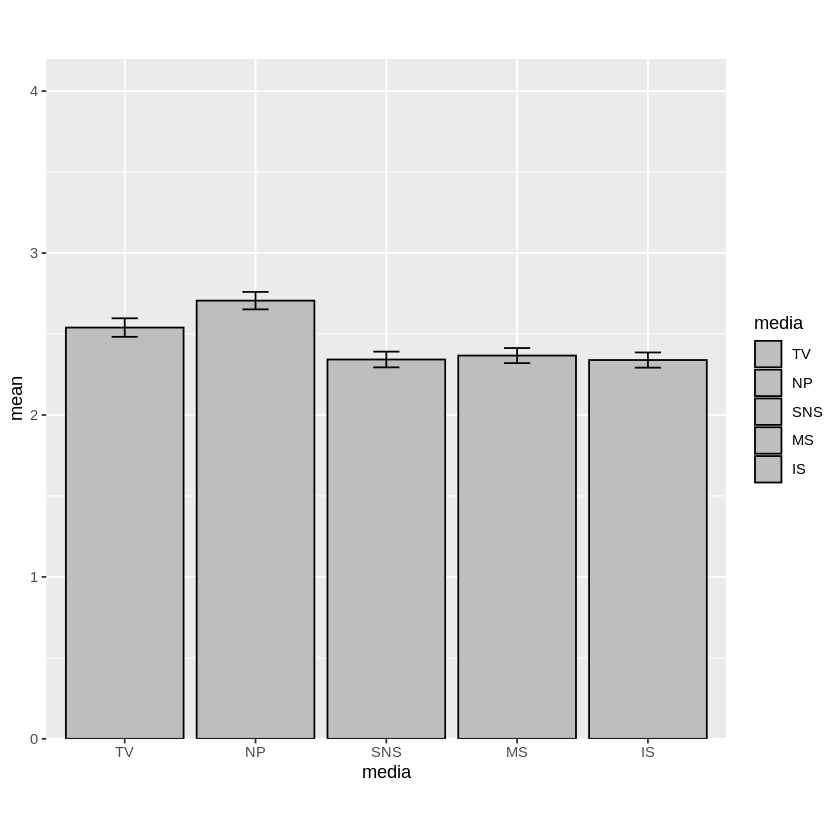

In [79]:
bp <- ggplot(ana.fix.des,
           aes(x = media,
               y = mean,
               fill = media
               )
           )

bp <- bp + geom_bar(stat="identity", colour="black", position=position_dodge())
bp <- bp + scale_fill_manual(values=c("gray","gray","gray","gray","gray"))
bp <- bp + geom_errorbar(aes(ymin=mean-se,ymax=mean+se), width=.2)
bp <- bp + scale_y_continuous(expand=c(0,0), limits=c(0, 4.2))
bp <- bp + theme(aspect.ratio=1)
bp

In [80]:
TukeyHSD(aov(q4~media, data=ana.data))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = q4 ~ media, data = ana.data)

$media
               diff         lwr          upr     p adj
NP-TV   0.160000000 -0.03854378  0.358543784 0.1798414
SNS-TV -0.190000000 -0.38854378  0.008543784 0.0683945
MS-TV  -0.166666667 -0.36521045  0.031877117 0.1477527
IS-TV  -0.193333333 -0.39187712  0.005210450 0.0606444
SNS-NP -0.350000000 -0.54854378 -0.151456216 0.0000160
MS-NP  -0.326666667 -0.52521045 -0.128122883 0.0000738
IS-NP  -0.353333333 -0.55187712 -0.154789550 0.0000128
MS-SNS  0.023333333 -0.17521045  0.221877117 0.9977052
IS-SNS -0.003333333 -0.20187712  0.195210450 0.9999990
IS-MS  -0.026666667 -0.22521045  0.171877117 0.9961420


In [81]:
TukeyHSD(aov(q4~media, data=ana.data.fix))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = q4 ~ media, data = ana.data.fix)

$media
               diff         lwr           upr     p adj
NP-TV   0.166089965 -0.03020149  0.3623814257 0.1418838
SNS-TV -0.197231834 -0.39352329 -0.0009403736 0.0482376
MS-TV  -0.173010381 -0.36930184  0.0232810797 0.1138736
IS-TV  -0.200692042 -0.39698350 -0.0044005812 0.0421977
SNS-NP -0.363321799 -0.55961326 -0.1670303390 0.0000048
MS-NP  -0.339100346 -0.53539181 -0.1428088857 0.0000257
IS-NP  -0.366782007 -0.56307347 -0.1704905466 0.0000038
MS-SNS  0.024221453 -0.17207001  0.2205129136 0.9972239
IS-SNS -0.003460208 -0.19975167  0.1928312527 0.9999988
IS-MS  -0.027681661 -0.22397312  0.1686097994 0.9953398


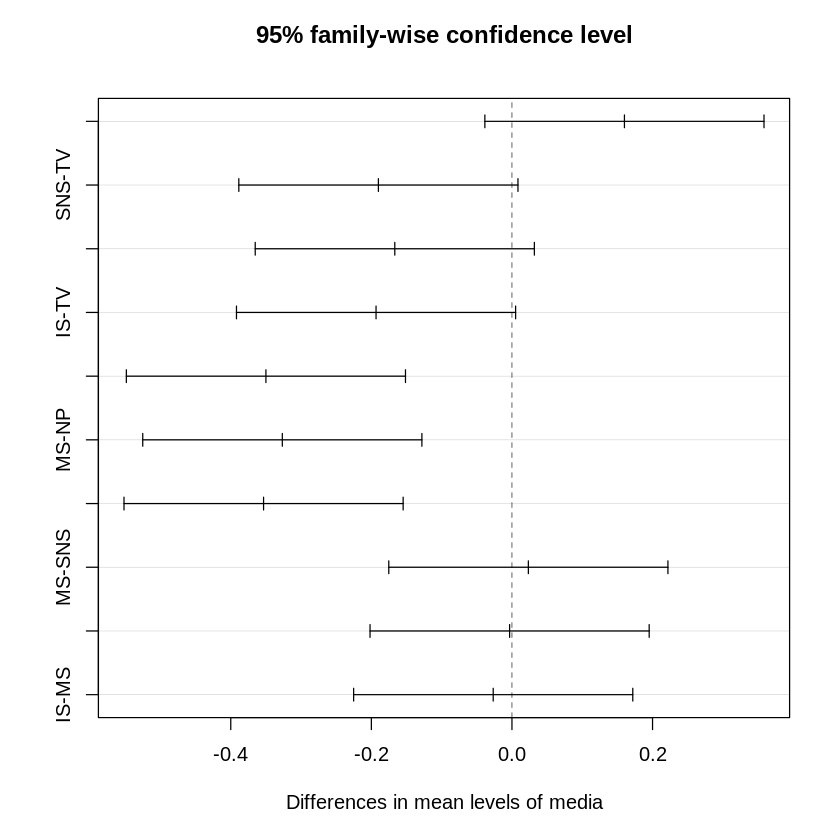

In [54]:
plot(TukeyHSD(aov(q4~media, data=ana.data)))

# 因子分析

## データ対応表

In [21]:
read.csv("input/426200000003_Layout.txt", sep="\t", fileEncoding="cp932", skip=1)

質問番号,質問タイプ,アイテム名,ラベル,回答タイプ,カテゴリ数,カラム,選択肢番号,質問文.選択肢
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
,,MID,MID,MID,NA,1,NA,回答者ID
,,DAY,DAY,D,NA,2,NA,回答日時
SEX,S,SEX,SEX,SA,2,3,NA,性別
,,,,,NA,NA,1,男性
,,,,,NA,NA,2,女性
AGE,NUM,AGE,AGE,NUM,NA,4,NA,年齢(歳)
GEN,S,GEN,GEN,SA,7,5,NA,年齢
,,,,,NA,NA,1,15歳未満
,,,,,NA,NA,2,15歳〜19歳


## データの読み込み

In [23]:
fa <- read.csv("input/426200000003_Rawdata.txt", sep="\t")
fa

MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,⋯,q3s10,q3s11,q3s12,q3s13,q3s14,q3s15,q3s16,q3s17,q3s18,q3s19
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000009568,2020/10/12 18:46,2,42,5,13,3,9,1,2,⋯,3,3,3,3,3,3,3,3,3,3
1000019995,2020/10/12 16:47,1,42,5,29,5,4,2,1,⋯,3,3,3,3,3,3,3,3,3,3
1000116965,2020/10/12 21:31,2,48,5,26,5,9,2,1,⋯,3,3,3,2,3,3,3,3,3,3
1000149966,2020/10/12 20:52,2,36,4,1,1,7,2,1,⋯,3,3,3,4,3,4,4,4,3,3
1000161850,2020/10/12 19:50,2,36,4,28,5,4,1,2,⋯,3,4,1,3,3,4,4,3,3,3
1000271070,2020/10/12 20:55,2,46,5,11,3,8,2,1,⋯,3,2,3,3,3,3,3,3,3,2
1000282124,2020/10/12 19:56,2,45,5,23,4,8,2,1,⋯,3,3,3,3,3,3,3,3,3,3
1000282836,2020/10/12 17:01,1,46,5,14,3,5,1,2,⋯,1,1,1,1,1,1,3,1,1,1
1000290870,2020/10/12 16:37,2,48,5,7,2,8,2,1,⋯,3,3,3,3,3,3,3,3,3,3


## 前処理

### 必要のない列の除去

In [24]:
fa.df <- fa %>%
    select(-c(DAY, GEN, PRE, ARE, JOB, MAR, CHI))

In [25]:
fa.df

MID,SEX,AGE,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,⋯,q3s10,q3s11,q3s12,q3s13,q3s14,q3s15,q3s16,q3s17,q3s18,q3s19
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000009568,2,42,3,3,3,3,3,2,2,⋯,3,3,3,3,3,3,3,3,3,3
1000019995,1,42,3,3,3,3,3,3,3,⋯,3,3,3,3,3,3,3,3,3,3
1000116965,2,48,3,3,3,3,3,2,2,⋯,3,3,3,2,3,3,3,3,3,3
1000149966,2,36,4,3,3,3,3,4,4,⋯,3,3,3,4,3,4,4,4,3,3
1000161850,2,36,4,3,4,4,4,4,4,⋯,3,4,1,3,3,4,4,3,3,3
1000271070,2,46,3,3,3,3,3,3,3,⋯,3,2,3,3,3,3,3,3,3,2
1000282124,2,45,4,3,3,3,4,3,3,⋯,3,3,3,3,3,3,3,3,3,3
1000282836,1,46,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,3,1,1,1
1000290870,2,48,1,1,1,1,1,1,1,⋯,3,3,3,3,3,3,3,3,3,3


### 因子分析用にデータ抽出

In [27]:
# 文章
fa.q1 <- fa.df %>%
    select(starts_with("q1"))
fa.q1

q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,q1s11,q1s12,q1s13,q1s14,q1s15,q1s16,q1s17,q1s18,q1s19
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,2,2,3,2,3,4,4,3,3,2,3,3,3,3
4,3,3,3,3,4,4,3,3,2,3,2,4,3,4,3,3,2,3
4,3,4,4,4,4,4,3,3,4,4,1,3,3,4,4,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
4,3,3,3,4,3,3,3,5,4,3,3,3,3,3,3,3,3,3
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [28]:
# 画像
fa.q2 <- fa.df %>%
    select(starts_with("q2"))
fa.q2

q2s1,q2s2,q2s3,q2s4,q2s5,q2s6,q2s7,q2s8,q2s9,q2s10,q2s11,q2s12,q2s13,q2s14,q2s15,q2s16,q2s17,q2s18,q2s19
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,3,3,3
4,3,3,4,3,4,4,3,3,3,3,3,4,3,4,5,4,3,3
4,3,3,3,4,4,3,3,3,3,4,1,3,3,4,4,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
4,3,4,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [29]:
# 動画
fa.q3 <- fa.df %>%
    select(starts_with("q3"))
fa.q3

q3s1,q3s2,q3s3,q3s4,q3s5,q3s6,q3s7,q3s8,q3s9,q3s10,q3s11,q3s12,q3s13,q3s14,q3s15,q3s16,q3s17,q3s18,q3s19
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,3,3,2,2,2,3,2,3,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3
4,3,4,4,3,4,4,3,3,3,3,3,4,3,4,4,4,3,3
3,3,3,4,4,4,4,3,3,3,4,1,3,3,4,4,3,3,3
3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,2
4,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,3,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


### KMO指標の確認

In [30]:
KMO(fa.q1)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = fa.q1)
Overall MSA =  0.95
MSA for each item = 
 q1s1  q1s2  q1s3  q1s4  q1s5  q1s6  q1s7  q1s8  q1s9 q1s10 q1s11 q1s12 q1s13 
 0.95  0.94  0.97  0.94  0.97  0.94  0.96  0.97  0.96  0.95  0.93  0.94  0.96 
q1s14 q1s15 q1s16 q1s17 q1s18 q1s19 
 0.96  0.94  0.94  0.94  0.95  0.95 

In [31]:
KMO(fa.q2)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = fa.q2)
Overall MSA =  0.96
MSA for each item = 
 q2s1  q2s2  q2s3  q2s4  q2s5  q2s6  q2s7  q2s8  q2s9 q2s10 q2s11 q2s12 q2s13 
 0.97  0.97  0.97  0.97  0.96  0.97  0.95  0.98  0.95  0.95  0.92  0.93  0.97 
q2s14 q2s15 q2s16 q2s17 q2s18 q2s19 
 0.96  0.98  0.97  0.95  0.94  0.97 

In [32]:
KMO(fa.q3)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = fa.q3)
Overall MSA =  0.97
MSA for each item = 
 q3s1  q3s2  q3s3  q3s4  q3s5  q3s6  q3s7  q3s8  q3s9 q3s10 q3s11 q3s12 q3s13 
 0.97  0.97  0.97  0.97  0.97  0.98  0.97  0.97  0.98  0.97  0.94  0.94  0.98 
q3s14 q3s15 q3s16 q3s17 q3s18 q3s19 
 0.98  0.97  0.97  0.97  0.98  0.97 

## 因子数決定

### 平行分析

Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


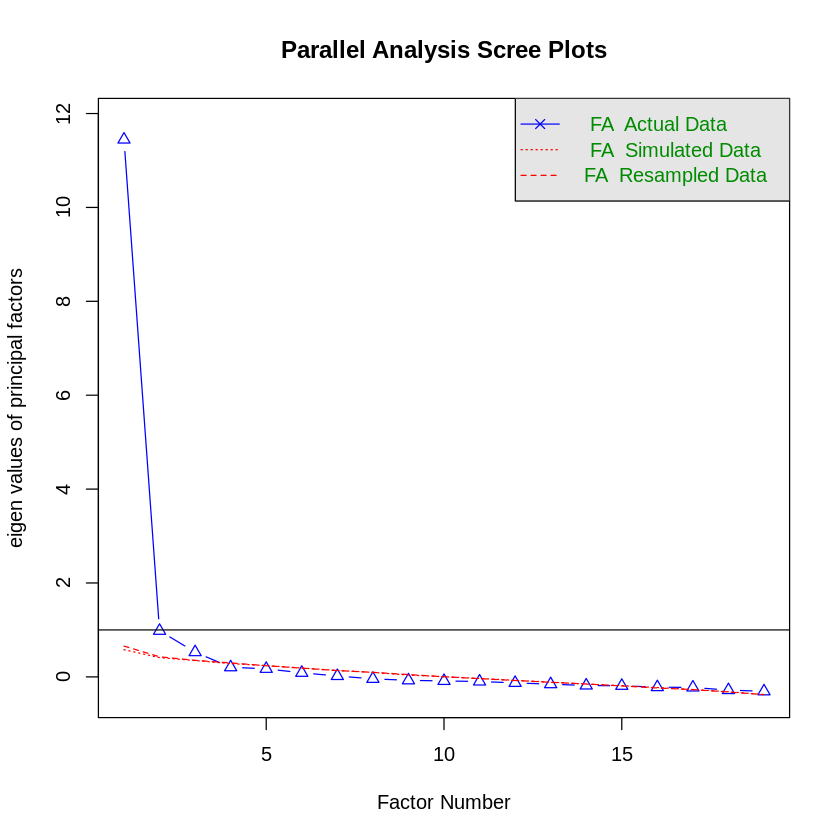

In [33]:
fa.parallel(fa.q1, fa="fa", use="complete.obs")

### VSS


Very Simple Structure
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = plot, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.97  with  1  factors
VSS complexity 2 achieves a maximimum of 0.98  with  2  factors

The Velicer MAP achieves a minimum of 0.02  with  3  factors 
BIC achieves a minimum of  -260.05  with  5  factors
Sample Size adjusted BIC achieves a minimum of  -15.08  with  8  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq     prob sqresid  fit RMSEA  BIC SABIC complex
1 0.97 0.00 0.039 152  1074 1.5e-138    4.85 0.97 0.148  220 701.8     1.0
2 0.54 0.98 0.028 134   653  2.7e-69    2.95 0.98 0.118 -100 325.0     1.6
3 0.44 0.84 0.024 117   423  2.8e-36    2.08 0.99 0.097 -234 136.7     2.0
4 0.44 0.83 0.028 101   322  6.3e-25    1.79 0.99 0.089 -245  74.9     2.1
5 0.43 0.76 0.031  86   223  3.7e-14    1.51 0.99 0.076 -260  12.6     2.3
6 0.35 0.70 0.035  72   167  1.5e-0

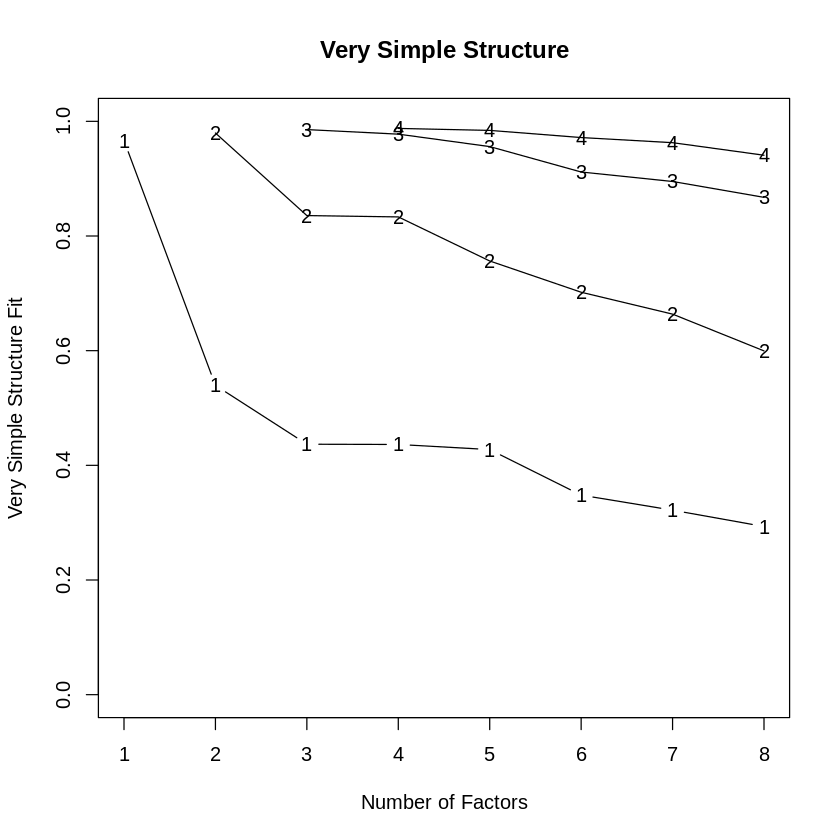

In [34]:
VSS(fa.q1)


Very Simple Structure
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = plot, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.98  with  1  factors
VSS complexity 2 achieves a maximimum of 0.99  with  2  factors

The Velicer MAP achieves a minimum of 0.02  with  2  factors 
BIC achieves a minimum of  -285.68  with  3  factors
Sample Size adjusted BIC achieves a minimum of  -29.51  with  8  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq    prob sqresid  fit RMSEA  BIC SABIC complex
1 0.98 0.00 0.025 152   794 1.7e-87    3.17 0.98 0.124  -61   421     1.0
2 0.74 0.99 0.021 134   510 3.4e-45    2.04 0.99 0.101 -243   181     1.6
3 0.38 0.84 0.022 117   372 2.5e-28    1.64 0.99 0.089 -286    85     2.2
4 0.38 0.78 0.026 101   290 4.0e-20    1.41 0.99 0.082 -278    42     2.5
5 0.33 0.72 0.031  86   232 2.6e-15    1.22 0.99 0.078 -252    21     2.7
6 0.31 0.70 0.036  72   180 2.9e-11    1.

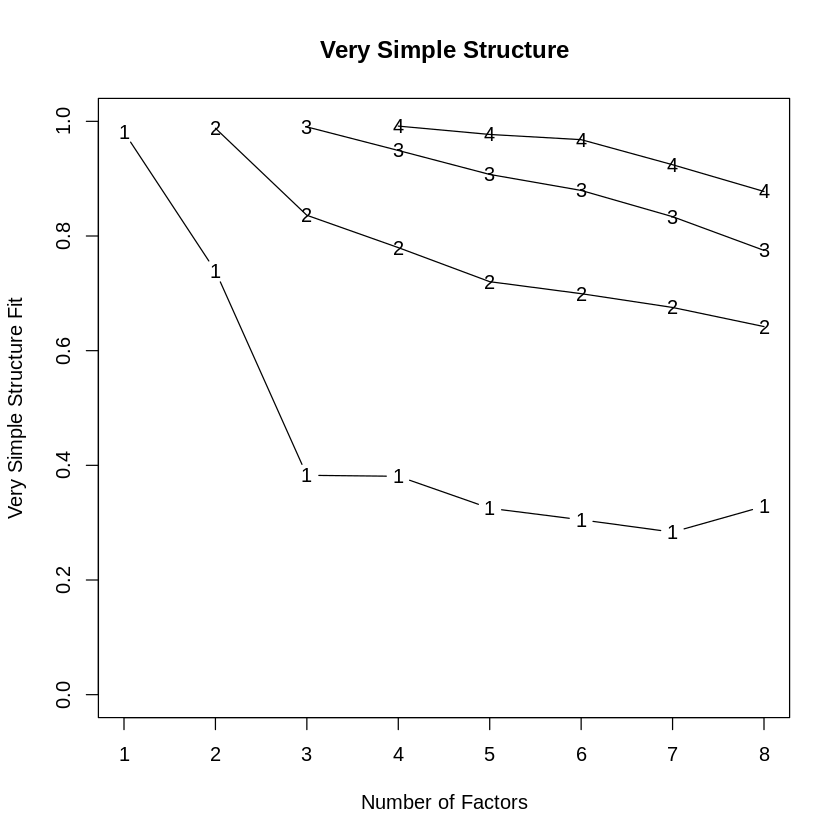

In [35]:
VSS(fa.q2)


Very Simple Structure
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = plot, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.99  with  1  factors
VSS complexity 2 achieves a maximimum of 0.99  with  2  factors

The Velicer MAP achieves a minimum of 0.02  with  3  factors 
BIC achieves a minimum of  -337.19  with  3  factors
Sample Size adjusted BIC achieves a minimum of  -48.47  with  7  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq    prob sqresid  fit RMSEA  BIC SABIC complex
1 0.99 0.00 0.022 152   684 1.6e-68    2.61 0.99 0.113 -170 311.8     1.0
2 0.73 0.99 0.024 134   513 1.1e-45    1.86 0.99 0.101 -240 184.5     1.6
3 0.41 0.85 0.022 117   320 7.9e-21    1.43 0.99 0.079 -337  33.8     2.3
4 0.38 0.78 0.026 101   250 1.1e-14    1.22 0.99 0.073 -317   3.1     2.5
5 0.26 0.63 0.031  86   182 7.3e-09    1.05 0.99 0.064 -301 -28.6     3.1
6 0.27 0.62 0.036  72   133 1.7e-05    0.

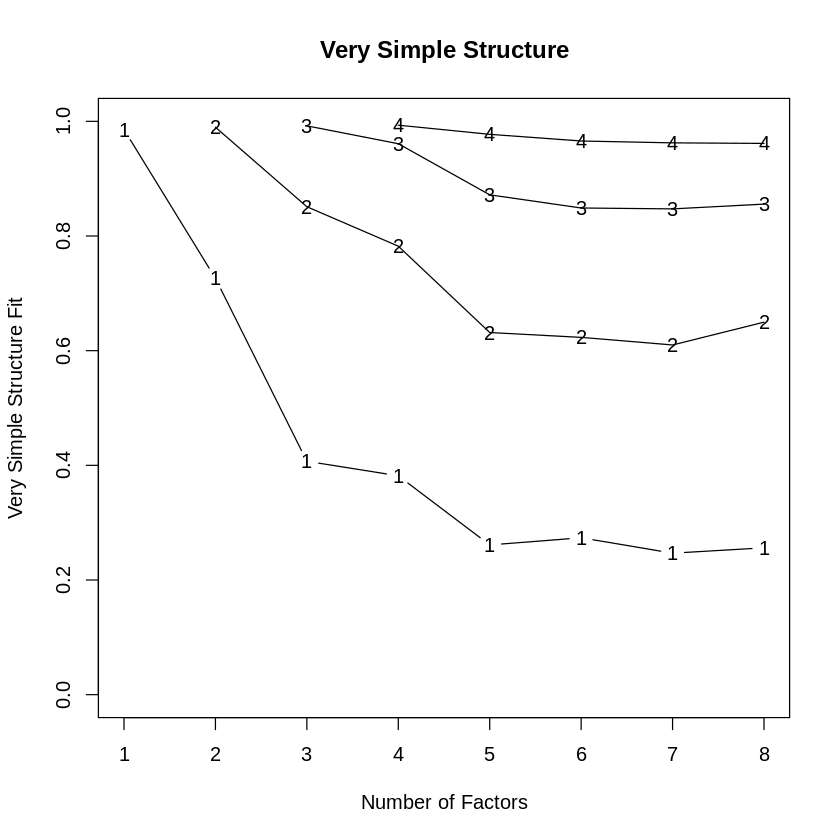

In [36]:
VSS(fa.q3)

In [37]:
# 因子数は３

In [50]:
res1 <- fa(fa.q1, nfactors=3, fm="minres", rotate="oblimin",
           use="complete.obs")
print(res1$loadings, digits=3, sort=T, cutoff=0)


Loadings:
      MR1    MR2    MR3   
q1s1   0.762  0.136 -0.122
q1s2   0.845 -0.104  0.063
q1s3   0.883  0.015 -0.005
q1s4   0.863  0.070 -0.100
q1s5   0.658  0.128  0.175
q1s6   0.817  0.020  0.075
q1s7   0.559  0.139  0.103
q1s8   0.580 -0.007  0.314
q1s13  0.253  0.561  0.075
q1s14  0.126  0.790 -0.005
q1s15  0.052  0.890 -0.061
q1s16  0.154  0.720 -0.048
q1s17 -0.020  0.636  0.277
q1s18 -0.132  0.899  0.118
q1s19  0.020  0.817 -0.011
q1s10  0.172  0.092  0.671
q1s11  0.054  0.028  0.826
q1s12 -0.009  0.220  0.637
q1s9   0.486  0.078  0.310

                 MR1   MR2   MR3
SS loadings    4.963 4.264 1.911
Proportion Var 0.261 0.224 0.101
Cumulative Var 0.261 0.486 0.586


In [51]:
res2 <- fa(fa.q2, nfactors=3, fm="minres", rotate="oblimin",
           use="complete.obs")
print(res2$loadings, digits=3, sort=T, cutoff=0)


Loadings:
      MR1    MR3    MR2   
q2s1   0.761  0.217 -0.111
q2s2   0.813  0.040 -0.014
q2s3   0.628  0.364 -0.131
q2s4   0.907  0.033 -0.098
q2s5   0.679  0.051  0.176
q2s6   0.806 -0.036  0.135
q2s7   0.820 -0.038  0.104
q2s8   0.556  0.216  0.134
q2s9   0.757 -0.117  0.220
q2s15  0.261  0.606  0.044
q2s17  0.007  0.853  0.066
q2s18  0.057  0.717  0.163
q2s10  0.274  0.049  0.621
q2s11  0.060  0.022  0.871
q2s12 -0.073  0.250  0.710
q2s13  0.338  0.389  0.211
q2s14  0.270  0.463  0.212
q2s16  0.350  0.442  0.105
q2s19  0.342  0.285  0.241

                 MR1   MR3   MR2
SS loadings    5.706 2.564 2.004
Proportion Var 0.300 0.135 0.105
Cumulative Var 0.300 0.435 0.541


In [52]:
res3 <- fa(fa.q3, nfactors=3, fm="minres", rotate="oblimin",
           use="complete.obs")
print(res3$loadings, digits=3, sort=T, cutoff=0)


Loadings:
      MR1    MR3    MR2   
q3s6   0.680  0.224  0.006
q3s7   0.855  0.055 -0.059
q3s9   0.610  0.096  0.128
q3s13  0.715 -0.010  0.217
q3s14  0.688  0.151  0.073
q3s15  0.932 -0.024 -0.004
q3s16  0.953 -0.073 -0.017
q3s17  0.831  0.106 -0.049
q3s18  0.785 -0.076  0.198
q3s1   0.194  0.743 -0.022
q3s2  -0.094  0.895  0.094
q3s3   0.023  0.792  0.087
q3s4   0.221  0.712 -0.014
q3s10  0.229  0.193  0.521
q3s11 -0.032  0.073  0.871
q3s12  0.113 -0.041  0.764
q3s5   0.483  0.335  0.082
q3s8   0.471  0.327  0.125
q3s19  0.334  0.319  0.153

                 MR1   MR3   MR2
SS loadings    6.363 2.961 1.791
Proportion Var 0.335 0.156 0.094
Cumulative Var 0.335 0.491 0.585


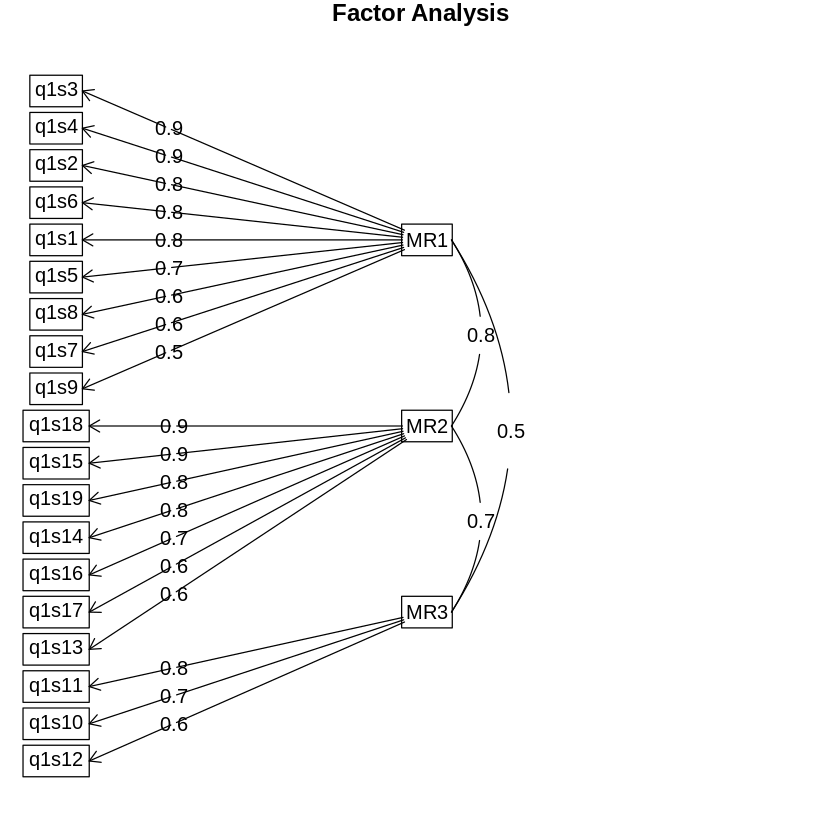

In [41]:
fa.diagram(res1)

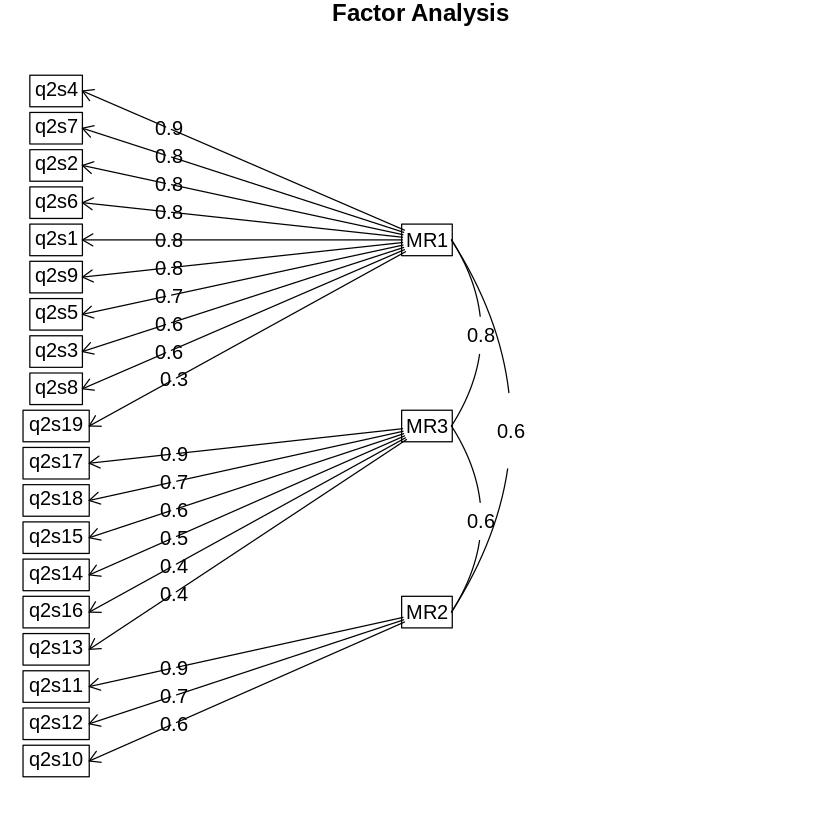

In [42]:
fa.diagram(res2)

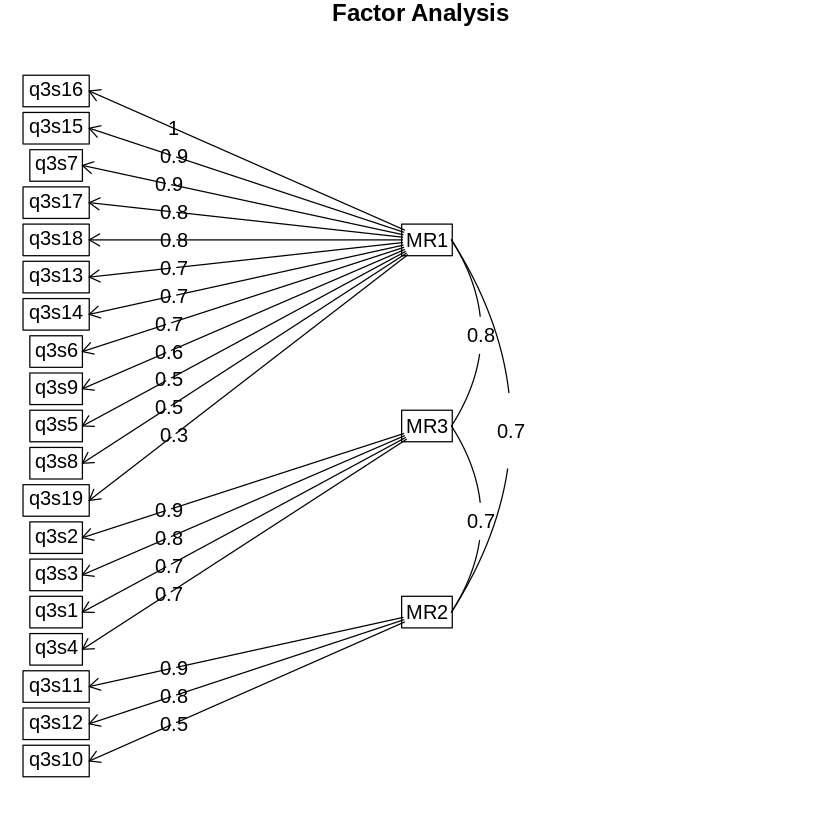

In [43]:
fa.diagram(res3)

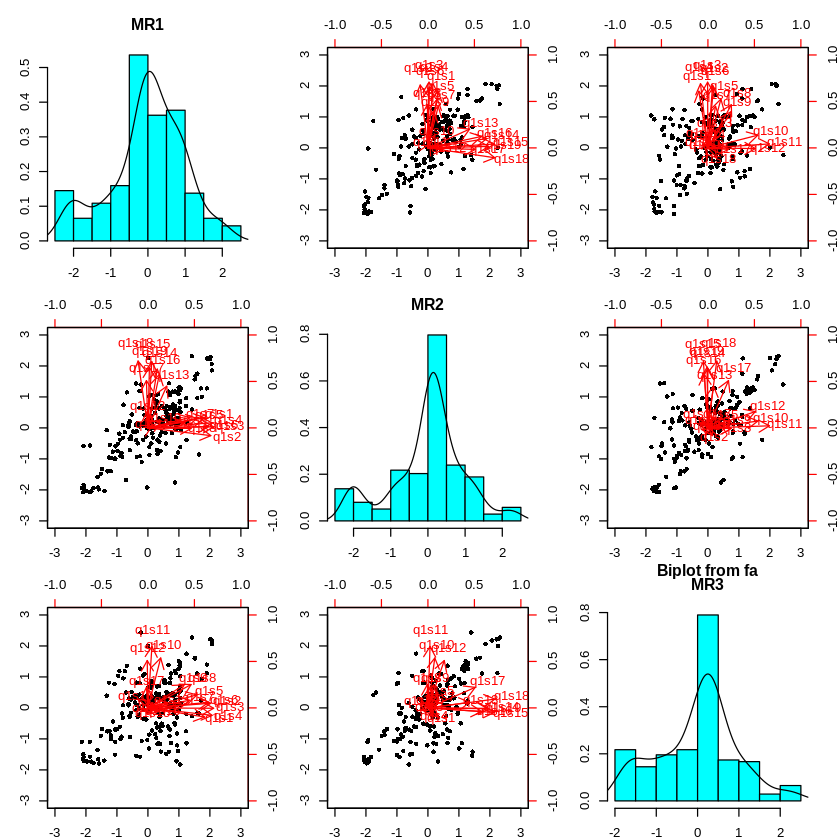

In [48]:
biplot(res1)